<div align='left' style="width:38%;overflow:hidden;">
<a href='http://inria.fr'>
<img src='https://github.com/lmarti/jupyter_custom/raw/master/imgs/inr_logo_rouge.png' alt='Inria logo' title='Inria'/>
</a>
</div>

# Machine Learning with `scikit-learn`

# 1. Introduction

## by [Nayat Sánchez Pi](http://www.nayatsanchezpi.com) and [Luis Martí](http://lmarti.com)

$\renewcommand{\vec}[1]{\boldsymbol{#1}}$

### About the notebook/slides

* The slides are _programmed_ as a [Jupyter](http://jupyter.org)/[IPython](https://ipython.org/) notebook.
* **Feel free to try them and experiment on your own by launching the notebooks.**

If you are using [nbviewer](http://nbviewer.jupyter.org) you can change to slides mode by clicking on the icon:

<div class="container-fluid">
  <div class="row">
      <div class="col-md-3"><span/></div>
      <div class="col-md-6">
              <img alt='view as slides' src='https://github.com/lmarti/jupyter_custom/raw/master/imgs/view-as-slides.png'/>
      </div>
      <div class="col-md-3" align='center'><span/></div>
  </div>
</div>

## [Machine learning](https://en.wikipedia.org/wiki/Machine_learning)

Programs with **parameters** that **automatically** **adjust** by **adapting** to previously seen **data**.

<br/>

<div class="container-fluid">
  <div class="row">
      <div class="col-md-3"><span/></div>
      <div class="col-md-6">
              <img class='img-thumbnail' src='imgs/01/machine-learning.png'/>
      </div>
      <div class="col-md-3" align='center'><span/></div>
  </div>
</div>

* Machine learning can be considered a subfield of **artificial intelligence**...
* ...since those algorithms can be seen as building blocks to make computers learn to behave more intelligently.
* **Generalize** instead of that just storing and retrieving data items like a database system would do.

## Machine learning: A modern alchemy

<div class="container-fluid">
    <div class="row">
        <div class="col-md-9">
            <ul>
            <li> Data is more abundant -and least expensive- than knowledge.</li>
            <li> Professionals from various areas of industry work on a particular philosopher's stone:</li>
            </ul>
            <br/>
            <h3><center>Turn data into knowledge!</center></h3><br/>
        </div>
        <div class="col-md-3">
            <img src="https://upload.wikimedia.org/wikipedia/commons/4/40/Raimundus_Lullus_alchemic_page.jpg"/>
            <small>Alchemic treatise of <a href="https://en.wikipedia.org/wiki/Ramon_Llull">Ramon Llull</a>.</small>
        </div>
    </div>
</div>

**Intelligent systems** find patterns and discover relations that are latent in large volumes of data.

Features of intelligent systems:

* Learning
* Adaptation
* Flexibility and robustness
* Provide explanations
* Discovery/creativity

### Learning

> Learning is the act of acquiring new, or modifying and reinforcing, existing knowledge, behaviors, skills, values, or preferences and may involve synthesizing different types of information.

* Construction and study of systems that can learn from data.

### Adaptation
* The environment/real world is in constant change.
* The capacity to adapt implies to be able to modify what has been learn in order to cope with those modifications.
* There are many real-world cases:
    * Changes in economy
    * Wear of mechanic parts of a robot
* In many instances the capacity to adapt is essential to solve the problem $\rightarrow$ *continuous learning*.


### Flexibility and robustness
* It is required to have a robust and consistent system.
    * Similar inputs should generate consistent outputs.
* Self-organization
* 'Classical' approaches based on Boolean algebra and logic have limited flexibility.

### Explanations

* Explanations are necessary to validate and find directions for improvement.
* It is not enough to automate the decision making process.
    * In many context explanations are necessary: medicine, credit evaluation, etc.
* They are important if a human expert takes part of the decission loop.
* Machine learning can become a research tool.

### Discovery/creativity

* Capacity of discovering processes and/or relations previously unknown.
* Creation of solution and artifacts.

Example: Evolving cars with genetic algorithms: http://www.boxcar2d.com/.

More formally, the machine learning can be described as:

* Having a **process** $\vec{F}:\mathcal{D}\rightarrow\mathcal{I}$ that **transforms** a given $\vec{x}\in\mathcal{D}$ in a $\vec{y}$. 
* Construct on a dataset $\Psi=\left\{\left<\vec{x}^{(i)},\vec{y}^{(i)}\right>\right\}$ with $i=1,\ldots,N$.
* Each $\left<\vec{x}_i,\vec{y}_i\right>$ represents an **input** and its corresponding **expected output**: $\vec{y}^{(i)}=\vec{F}\left(\vec{x}^{(i)}\right)$.
* **Optimize** a **model** $\mathcal{M}(\vec{x};\vec{\theta})$ by adjusting its parameters $\vec{\theta}$.
    * Make $\mathcal{M}()$ to be as similar as possible to $\vec{F}()$ by optimizing one or more error (loss) functions.

*Note*: Generally, $\mathcal{D}\subseteq\mathbb{R}^n$; the definition of $\mathcal{I}$ depends on the problem.

## Classes of machine learning problems 

* *Classification*: $\vec{F}: \mathcal{D}\rightarrow\left\{1,\ldots, k\right\}$; $\vec{F}(\cdot)$ defines 'categories' or 'classes' labels.
* *Regression*: $\vec{F}: \mathbb{R}^n\rightarrow\mathbb{R}$; it is necessary to predict a real-valued output instead of categories.
* *Density estimation*: predicit a function $p_\mathrm{model}: \mathbb{R}^n\rightarrow\mathbb{R}$, where $p_\mathrm{model}(\vec{x})$ can be interpreted as a [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) on the set that the examples were drawn from.
* *Clustering*: group a set of objects in such a way that objects in the same group (*cluster*) are more *similar* to each other than to those in other groups (clusters).
* *Synthesis*: generate new examples that are similar to those in the training data.

> Many more: [times-series](https://en.wikipedia.org/wiki/Time_series) analysis, [anomaly detection](https://en.wikipedia.org/wiki/Anomaly_detection), [imputation](https://en.wikipedia.org/wiki/Imputation), transcription, etc.

##  Supervised learning

* Sometimes we can observe the pairs $\left<\vec{x}_i,\vec{y}_i\right>$:
    * We can use the $\vec{y}_i$'s to provide a *scalar feedback* on how good is the model $\mathcal{M}(\vec{x};\vec{\theta})$.
    * That feed back is known as the *loss function*.
    * Modify parameters $\vec{\theta}$ as to improve $\mathcal{M}(\vec{x};\vec{\theta})$ $\rightarrow$ *learning*.

An example of a supervised problem (regression)

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rc("font", family="serif")
# numpy - pretty matrix
np.set_printoptions(
    precision=3, threshold=1000, edgeitems=5, linewidth=80, suppress=True
)

import seaborn

seaborn.set(style="whitegrid")
seaborn.set_context("talk")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings

warnings.filterwarnings("ignore")

In [3]:
# Fixed seed to make the results replicable - remove in real life!
random.seed(42)

In [4]:
X = np.arange(100)

Let's suppose that we have a phenomenon such that
$$y_\text{real} = \sin\left(\frac{\pi x}{50}\right)\,.$$

In [5]:
y_real = np.sin(X * np.pi / 50)

Introducing some uniform random noise to simulate measurement noise:

In [6]:
y_measured = y_real + (np.random.rand(100) - 0.5) / 1.8

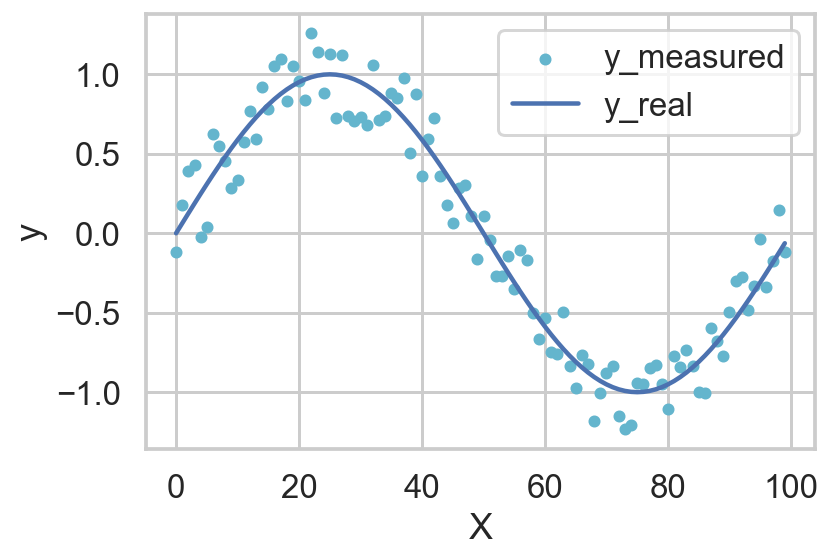

In [7]:
plt.scatter(X, y_measured, marker=".", color="c", label="y_measured")
plt.plot(X, y_real, color="b", label="y_real")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(frameon=True);

We can now learn from the dataset $\Psi=\left\{x, y_\text{measured}\right\}$.
* We are going to use a [support vector regressor](https://en.wikipedia.org/wiki/Support_vector_machine) from [`scikit-learn`](http://scikit-learn.org/).

Training (adjusting) SVR

In [8]:
from sklearn.svm import SVR

In [9]:
clf = SVR()  # using default parameters
clf.fit(X.reshape(-1, 1), y_measured)

SVR()

We can now see how our SVR models the data.

In [10]:
y_pred = clf.predict(X.reshape(-1, 1))

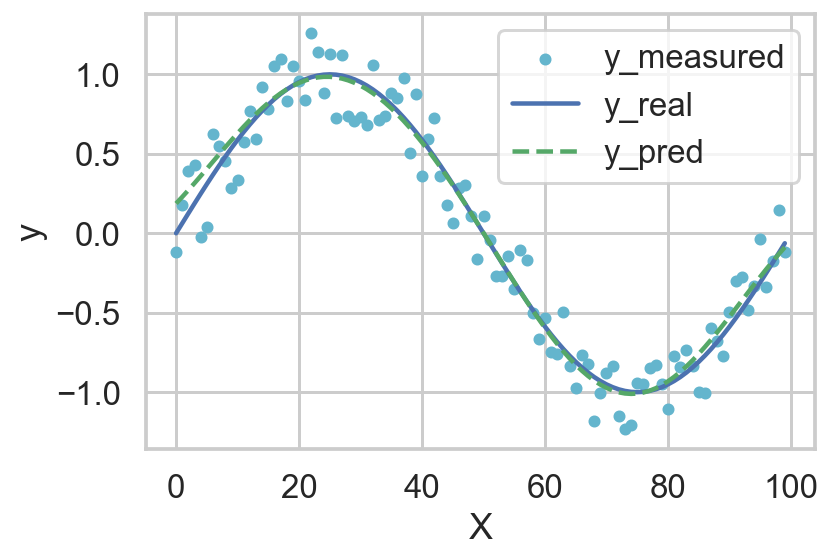

In [11]:
plt.scatter(X, y_measured, marker=".", color="c", label="y_measured")
plt.plot(X, y_real, color="b", label="y_real")
plt.plot(X, y_pred, "g--", label="y_pred")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(frameon=True);

By the way, we can observe for the first time an important negative phenomenon: *overfitting*.

* One of the main concerns in machine learning has to do with how to avoid overfitting.
* We will be dedicating part of the course to the methods that we have for control overfitting.

For example, by choosing other values of the hyperparameters:

In [12]:
clf = SVR(gamma="auto", C=10000)
clf.fit(X.reshape(-1, 1), y_measured)

SVR(C=10000, gamma='auto')

In [13]:
y_overfit = clf.predict(X.reshape(-1, 1))

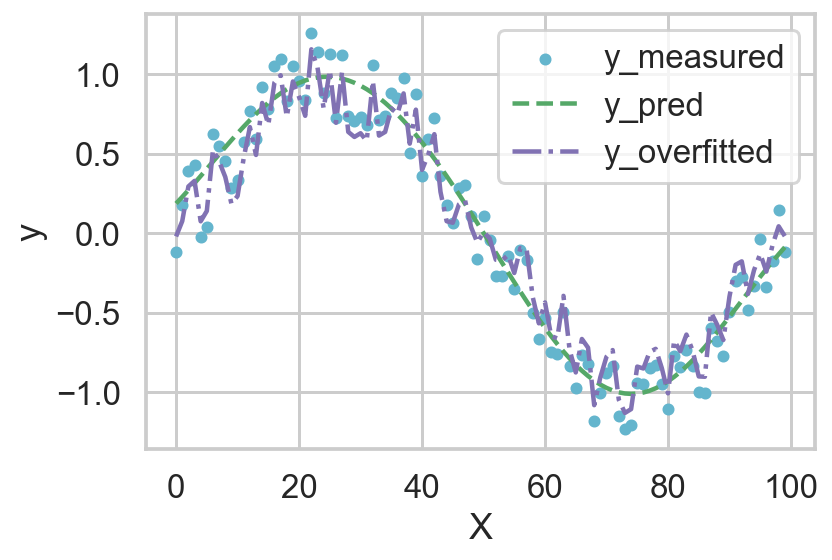

In [14]:
plt.scatter(X, y_measured, marker=".", color="c", label="y_measured")
plt.plot(X, y_pred, "g--", label="y_pred")
plt.plot(X, y_overfit, "m-.", label="y_overfitted")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(frameon=True);

## What if... we don't have a label?

<br/>
<div class="container-fluid">
  <div class="row">
      <div class="col-md-2"><span/></div>
      <div class="col-md-8">
              <img class='img-thumbnail' src='imgs/01/balls.jpg'/>
      </div>
      <div class="col-md-2" align='center'><span/></div>
  </div>
</div>

## [Unsupervised learning](http://en.wikipedia.org/wiki/Unsupervised_learning)

In some cases we can just observe a series of items or values, e.g., $\Psi=\left\{\vec{x}_i\right\}$:
* It is necessary to find the *hidden structure* of *unlabeled data*.
* We need a measure of correctness of the model that does not requires an expected outcome.
* Although, at first glance, it may look a bit awkward, this type of problem is very common.
    
    * Related to anomaly detection, clustering, etc.
    


### An unsupervised learning example: Clustering

Let's generate a dataset that is composed by three groups or clusters of elements, $\vec{x}\in\mathbb{R}^2$. 

In [15]:
x_1 = np.random.randn(30, 2) + (5, 5)
x_2 = np.random.randn(30, 2) + (10, 0)
x_3 = np.random.randn(30, 2) + (0, 2)

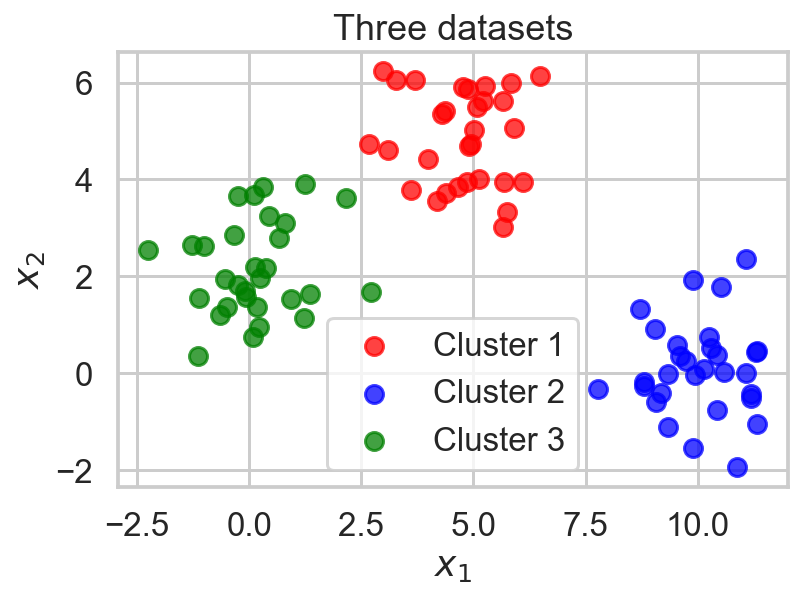

In [16]:
plt.scatter(x_1[:, 0], x_1[:, 1], c="red", label="Cluster 1", alpha=0.74)
plt.scatter(x_2[:, 0], x_2[:, 1], c="blue", label="Cluster 2", alpha=0.74)
plt.scatter(x_3[:, 0], x_3[:, 1], c="green", label="Cluster 3", alpha=0.74)
plt.legend(frameon=True)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Three datasets");

Preparing the training dataset.

In [17]:
x = np.concatenate((x_1, x_2, x_3), axis=0)
x.shape

(90, 2)

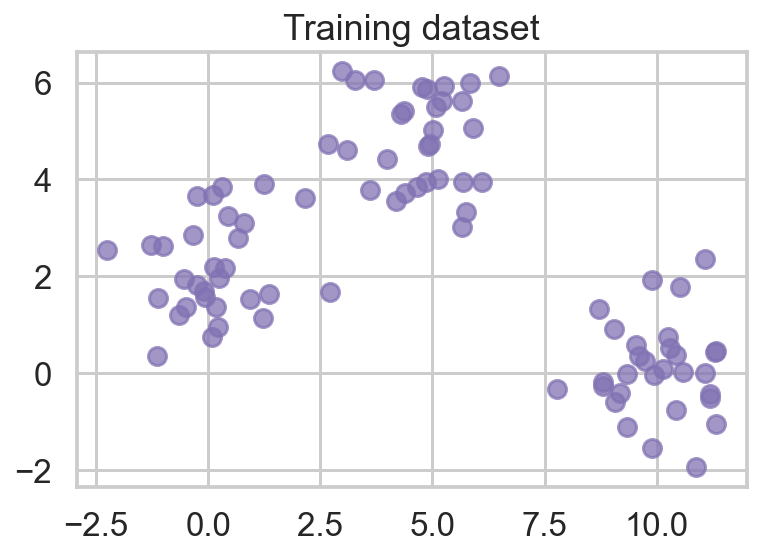

In [18]:
plt.scatter(x[:, 0], x[:, 1], c="m", alpha=0.74)
plt.title("Training dataset");

We can now try to learn what clusters are in the dataset. We are going to use the [$k$-means clustering algorithm](https://en.wikipedia.org/wiki/K-means_clustering).

In [19]:
from sklearn.cluster import KMeans

In [20]:
clus = KMeans(n_clusters=3)
clus.fit(x)

KMeans(n_clusters=3)

In [21]:
labels_pred = clus.predict(x)
print(labels_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]


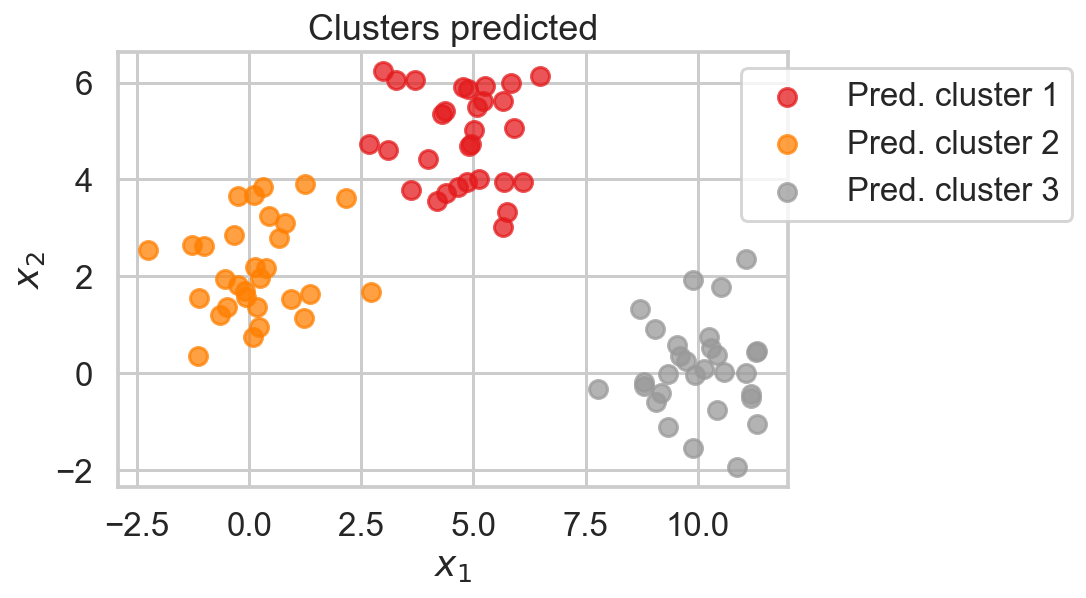

In [22]:
cm = iter(plt.cm.Set1(np.linspace(0, 1, len(np.unique(labels_pred)))))
for label in np.unique(labels_pred):
    plt.scatter(
        x[labels_pred == label][:, 0],
        x[labels_pred == label][:, 1],
        color=next(cm),
        alpha=0.74,
        label="Pred. cluster " + str(label + 1),
    )
plt.legend(loc="upper right", bbox_to_anchor=(1.45, 1), frameon=True)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Clusters predicted");

Needing to set the number of clusters can lead to problems.

In [23]:
clus = KMeans(n_clusters=10)
clus.fit(x)
labels_pred = clus.predict(x)

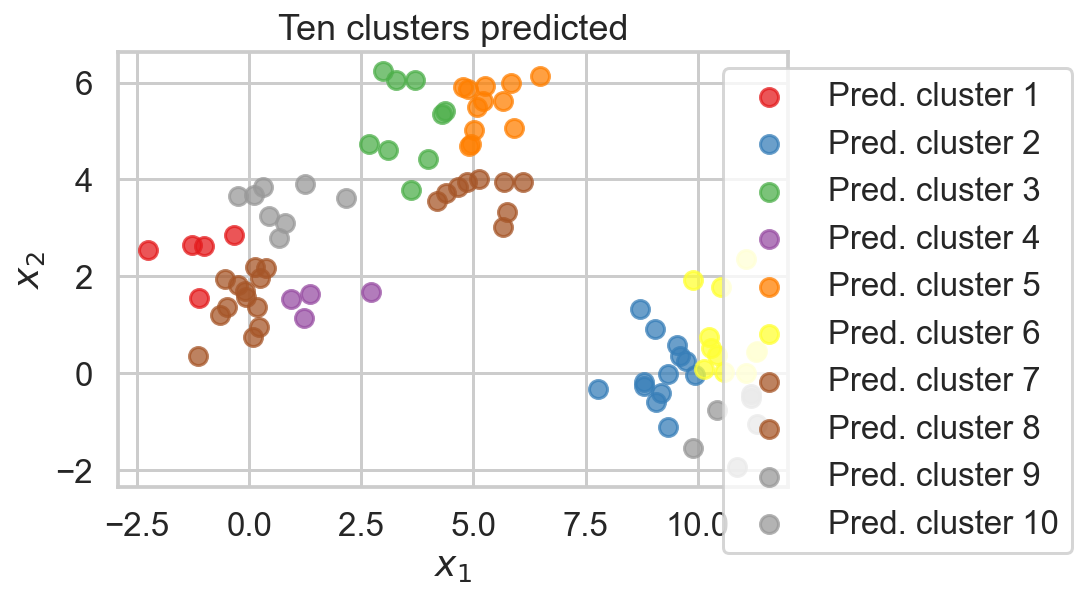

In [24]:
cm = iter(plt.cm.Set1(np.linspace(0, 1, len(np.unique(labels_pred)))))
for label in np.unique(labels_pred):
    plt.scatter(
        x[labels_pred == label][:, 0],
        x[labels_pred == label][:, 1],
        color=next(cm),
        alpha=0.74,
        label="Pred. cluster " + str(label + 1),
    )
plt.legend(loc="upper right", bbox_to_anchor=(1.45, 1), frameon=True)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Ten clusters predicted");

## [Semi-supervised learning](http://en.wikipedia.org/wiki/Semi-supervised_learning):
* Obtaining a supervised learning dataset can be expensive.
* Some times it can be complemented with a "cheaper" unsupervised learning dataset.
* What if we first learn as much as possible from unlabeled data and then use the labeled dataset.    

## Reinforcement learning

![Reinforcement learning](https://www.kdnuggets.com/images/mathworks-reinforcement-learning-fig1-543.jpg)
Taken from [Three Things to Know About Reinforcement Learning](https://www.kdnuggets.com/2019/10/mathworks-reinforcement-learning.html)

## Reinforcement learning (II)

* Inspired by behavioral psychology;
* How to take actions in an environment so as to maximize some notion of cumulative reward?
* Differs from standard supervised learning in that correct input/output pairs are never presented, 
* ...nor sub-optimal actions explicitly corrected. 
* Involves finding a balance between exploration (of uncharted territory) and exploitation (of current knowledge). 

## Problems types vs learning

<br/>
<div class="container-fluid">
  <div class="row">
      <div class="col-md-2"><span/></div>
      <div class="col-md-8">
              <img class='img-thumbnail' src='imgs/01/ml-problems-unlinked.png'/>
      </div>
      <div class="col-md-2" align='center'><span/></div>
  </div>
</div>

## Problems types and learning

<br/>
<div class="container-fluid">
  <div class="row">
      <div class="col-md-2"><span/></div>
      <div class="col-md-8">
              <img class='img-thumbnail' src='imgs/01/ml-problems.png'/>
      </div>
      <div class="col-md-2" align='center'><span/></div>
  </div>
</div>

## Components of a machine learning problem/solution

- *A parametrized family of functions* $\mathcal{M}(\vec{x};\theta)$ describing how the learner will behave on new examples.
    * What output $\mathcal{M}(\vec{x};\theta)$ will produce given some input $\vec{x}$?
- *A loss function* $\ell()$ describing what scalar loss $\ell(\hat{\vec{y}}, \vec{y})$ is associated with each supervised example $\langle x, y\rangle$, as a function of the learner's output $\hat{\vec{y}} = \mathcal{M}(\vec{x};\theta)$ and the target output $\vec{y}$.
- Training consists in choosing the parameters $\theta$ given some training examples $\Psi=\left\{\left<\vec{x}^{(i)},\vec{y}^{(i)}\right>\right\}$ sampled from an unknown data generating distribution $P(X, Y)$.

## Components of a machine learning problem/solution (II)

- Define a *training criterion*. 
    - *Ideally*: to minimize the expected loss sampled from the unknown data generating distribution.
    - This is not possible because the expectation makes use of the true underlying $P()$...
    - ...but we only have access to a finite number of training examples, $\Psi$. 
    - A *training criterion* usually includes an empirical average of the loss over the training set,
    
    $$\min_{\theta}\ \mathbf{E}_{\Psi}[\ell(\mathcal{M}(\vec{x};\vec{\theta}), \vec{y})].$$

## Components of a machine learning problem/solution (III)

- Some additional terms (called *regularizers*) can be added to enforce preferences over the choices of $\vec{\theta}$.

$$\text{min}\ \mathbf{E}_{\Psi}[\ell(\mathcal{M}(\vec{x};\vec{\theta}), \vec{y})] + R_{1}(\vec{\theta})+\cdots+R_{r}(\vec{\theta}).$$

- *An optimization procedure* to approximately minimize the training criterion by modifying $\theta$.

## The (endless) loop of machine learning

<div class="container-fluid">
  <div class="row">
      <div class="col-md-2"><span/></div>
      <div class="col-md-8" align='center'>
              <img src='https://feedzai.com/aptopees/2020/11/phases-of-the-data-science-loop-machine-learning-feedzai-min.png'>
              <small>Taken from <a href="https://feedzai.com/blog/machine-learning-the-data-science-loop/">Elizabeth Cruz, Machine learning: The data science loop.</a>.</small>
      </div>
      <div class="col-md-2" align='center'><span/></div>
  </div>
</div>

## Datasets and model evaluation

* We need a dataset for training (or fitting/optimizing) the model: **Training dataset**
* We need another dataset to assess progress and compute the training criterion: **Validation dataset**
* As most ML approaches are stochastic and to contrast different approaches we need to have another dataset: **Test dataset**

<div class="container-fluid">
  <div class="row">
      <div class="col-md-2"><span/></div>
      <div class="col-md-8" align='center'>
              <img src='https://dziganto.github.io/assets/images/train-validate-test.png?raw=true'/>
              <small>Taken from <a href="https://dziganto.github.io/cross-validation/data%20science/machine%20learning/model%20tuning/python/Model-Tuning-with-Validation-and-Cross-Validation/">David Ziganto's Model Tuning</a>.</small>
      </div>
      <div class="col-md-2" align='center'><span/></div>
  </div>
</div>

**This is a cornerstone issue of machine learning and we will be coming back to it.**

There are many approaches/methods/algorithms to machine learning.
<br/>
<div class="container-fluid">
  <div class="row">
      <div class="col-md-2"><span/></div>
      <div class="col-md-8" align='center'>
              <img class='img-thumbnail' src='imgs/01/ml.png'/>
      </div>
      <div class="col-md-2" align='center'><span/></div>
  </div>
</div>

A machine learning flowchart

<div class="container-fluid">
  <div class="row">
      <div class="col-md-2"><span/></div>
      <div class="col-md-8" align='center'>
              <img class='img-thumbnail' alt='Choosing the right estimator' src='http://scikit-learn.org/stable/_static/ml_map.png'/>
              <small>Taken from <a href="http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html">scikit-learn - Choosing the right estimator</a>.</small>
      </div>
      <div class="col-md-2" align='center'><span/></div>
  </div>
</div>

# *Nature-inspired* machine learning

* Cellular automata
* **Neural computation**
* Evolutionary computation
* Swarm intelligence
* Artificial immune systems
* etc.!

# Final remarks
* Different classes of machine learning problems:
    * Classification
    * Regression
    * Clustering.
* Different classes of learning scenarions:
    * Supervised, 
    * unsupervised, 
    * semi-supervised, and 
    * reinforcement learning.
* Model, hyperparameters, dataset, loss function, optimization.

# Homework
 
* Read Chapters 1, 2 and 3 of Ian Goodfellow, Yoshua Bengio and Aaron Courville (2017) [Deep Learning](http://www.deeplearningbook.org) MIT Press.
* Read Chapter 2 of Hastie, Tibshirani and Friedman (2009) [The Elements of Statistical Learning (2nd edition)](http://statweb.stanford.edu/~tibs/ElemStatLearn/) Springer-Verlag.

<hr/>
<div class="container-fluid">
      <div class="row">
          <div class="col-md-3" align='center'>
              <img align='center' alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png"/>
          </div>
          <div class="col-md-9">
              This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.
          </div>
      </div>
</div>

In [25]:
# this code is here for cosmetic reasons
from IPython.core.display import HTML
from urllib.request import urlopen

HTML(
    urlopen(
        "https://raw.githubusercontent.com/lmarti/jupyter_custom/master/custom.include"
    )
    .read()
    .decode("utf-8")
)

---